# Gradient Descent

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [5]:
# Load the dataset
df = pd.read_csv('data/student_scores.csv')

In [6]:
# Display the first few rows of the dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
# Split the data into training and testing sets
df_train, df_test = train_test_split(df, train_size=0.7, random_state=0)

# Display the shape of the training and testing sets
print("Training set shape:", df_train.shape)
print("Testing set shape:", df_test.shape)

Training set shape: (17, 2)
Testing set shape: (8, 2)


In [9]:

# Initialize Min-Max Scaler to normalize numerical features
rescale = MinMaxScaler()

# Specify numerical features to be normalized
num_features = ['Hours', 'Scores']

# Normalize the training data
norm_train_data = rescale.fit_transform(df_train.loc[:, num_features])


print(norm_train_data.shape, "\n",type(norm_train_data))

(17, 2) 
 <class 'numpy.ndarray'>


In [10]:
# Create a DataFrame with normalized training data
df_train = pd.DataFrame(norm_train_data, columns=num_features)

# Display the first few rows of the normalized training data
df_train.head()

,Hours,Scores
0,0.716049,0.756410
1,0.000000,0.000000
2,0.493827,0.384615
3,0.814815,0.871795
4,0.271605,0.320513


In [11]:
# Extract features (X_train) and target variable (y_train)
X_train = np.array(df_train['Hours'])
y_train = np.array(df_train['Scores'])

In [12]:
# Define a function for gradient descent
def gradient_descent(X, y, learning_rate=0.001, iterations=1000, m_curr=0, c_curr=0):
    N = float(len(y))
    # Initialize a DataFrame to store gradient descent progress
    grad = pd.DataFrame(columns=['slope', 'intercept', 'mse'])
    
    # Perform gradient descent iterations
    for i in range(iterations):
        y_pred = (m_curr * X) + c_curr
        mse = np.sum((y - y_pred)**2) / N
        derivative_m = -(2/N) * np.sum(X * (y - y_pred))      # derivative wrt m
        derivative_c = -(2/N) * np.sum(y - y_pred)            # derivative wrt c
        m_curr -= learning_rate * derivative_m   # updating m
        c_curr -= learning_rate * derivative_c   # updating c
        grad.loc[i] = [m_curr, c_curr, mse]
    
    return grad

In [13]:
# Apply gradient descent and store the progress
grad = gradient_descent(X_train, y_train, learning_rate=0.1)

# Display the last few rows of the gradient descent progress
grad.tail()


,slope,intercept,mse
995,1.016505,-0.049509,0.005206
996,1.016505,-0.049509,0.005206
997,1.016505,-0.049509,0.005206
998,1.016505,-0.049510,0.005206
999,1.016505,-0.049510,0.005206


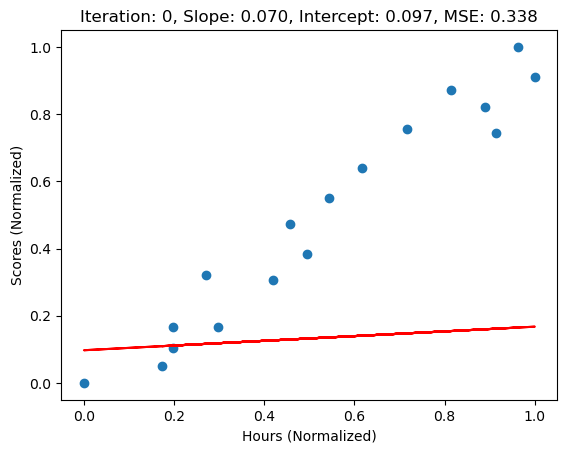

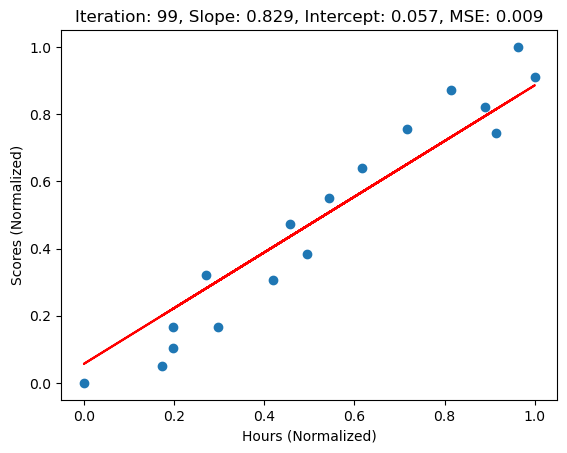

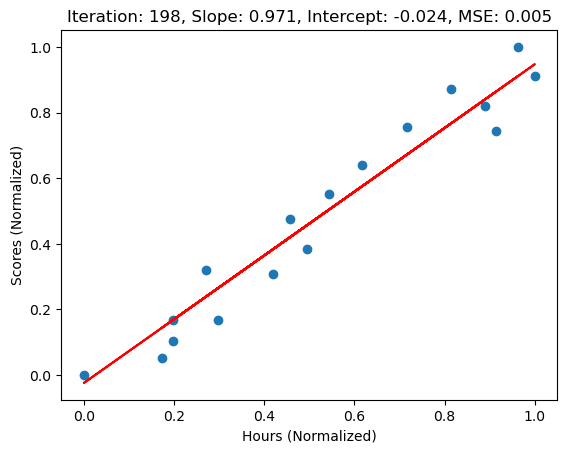

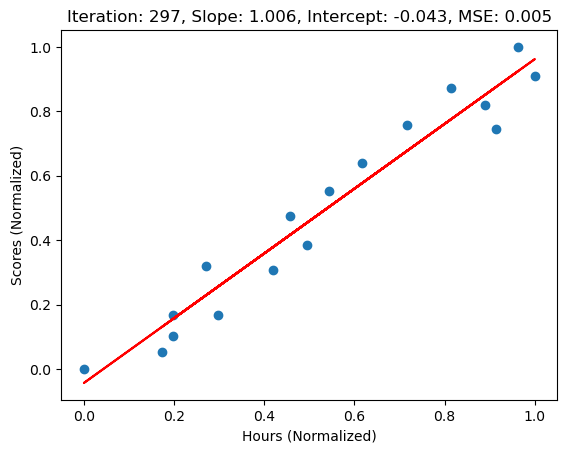

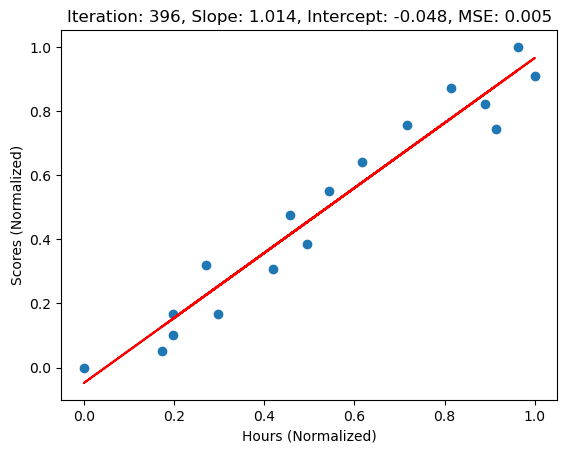

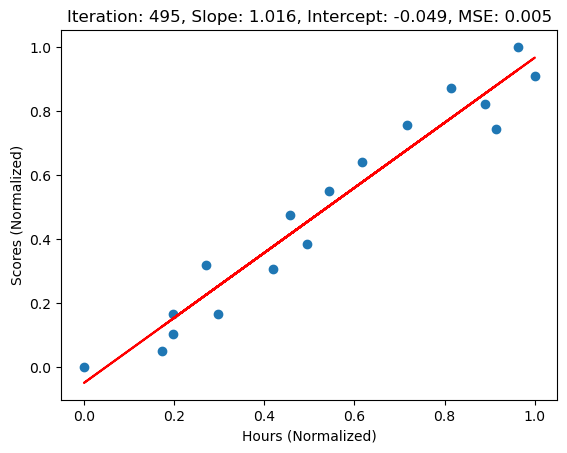

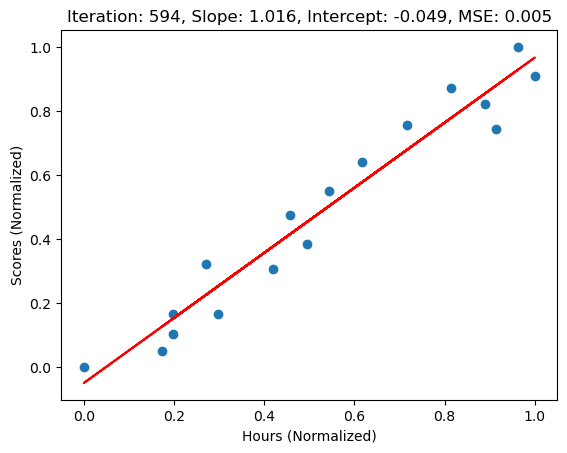

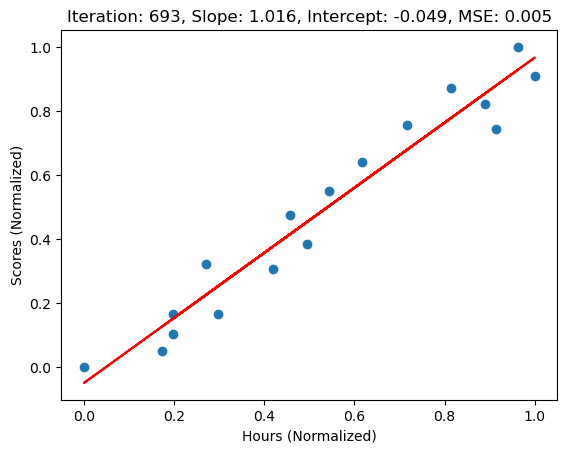

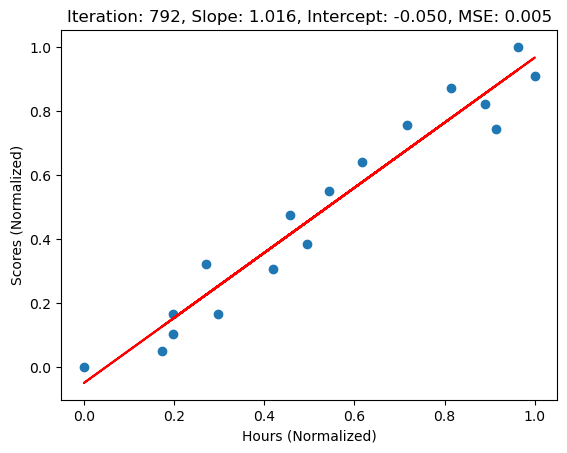

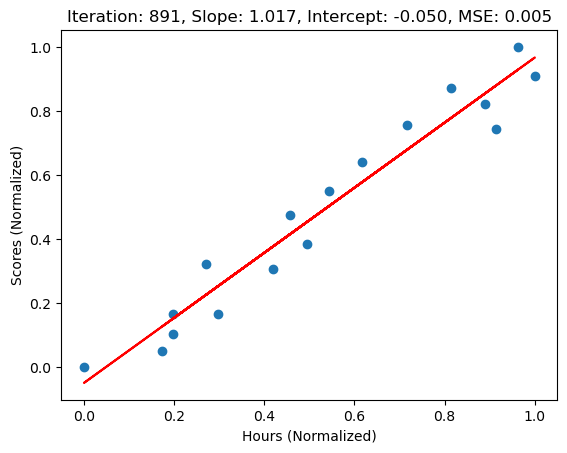

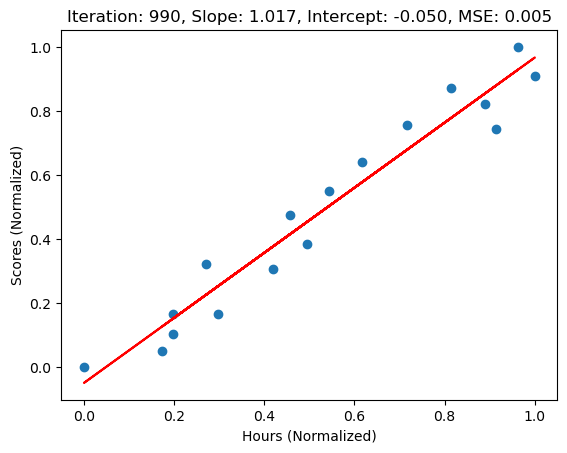

In [14]:
# Import time for creating an animation effect in the plot
import time

# Plot the regression lines at different iterations
for i in range(0, grad.shape[0], 99):
    plt.scatter(X_train, y_train)
    plt.plot(X_train, grad.iloc[i, 1] + grad.iloc[i, 0] * X_train, 'r')
    plt.title("Iteration: {}, Slope: {:.3f}, Intercept: {:.3f}, MSE: {:.3f}".format(
        i, grad.iloc[i, 0], grad.iloc[i, 1], grad.iloc[i, 2]))
    plt.xlabel('Hours (Normalized)')
    plt.ylabel('Scores (Normalized)')
    plt.show()
    time.sleep(1)